In [1]:
import pandas as pd

In [2]:
# Load the cleaned dataset (after filling missing AQI values)
cleaned_path = "../data/processed/cleaned_pollutants_sorted.csv"
df = pd.read_csv(cleaned_path)

# Convert 'Date Local' to datetime if needed
df['Date Local'] = pd.to_datetime(df['Date Local'], errors='coerce')

# Summary of missing values for AQI columns
missing_so2_aqi = df['SO2 AQI'].isnull().sum()
missing_co_aqi = df['CO AQI'].isnull().sum()

print(f"Missing SO2 AQI values after estimation: {missing_so2_aqi}")
print(f"Missing CO AQI values after estimation: {missing_co_aqi}")

# Show some rows with missing SO2 or CO AQI (should be very few or none)
print("\nRows with missing SO2 AQI:")
print(df[df['SO2 AQI'].isnull()].head())

print("\nRows with missing CO AQI:")
print(df[df['CO AQI'].isnull()].head())

# Optional: Verify that the estimated AQI values correspond to the compute_aqi function logic
# For example, show rows where original AQI was missing but Mean values exist
print("\nSample rows where SO2 AQI was estimated:")
print(df[(df['SO2 AQI'].notnull()) & (df['SO2 Mean'].notnull())].sample(5))

print("\nSample rows where CO AQI was estimated:")
print(df[(df['CO AQI'].notnull()) & (df['CO Mean'].notnull())].sample(5))

# Quick statistics summary for SO2 and CO AQI columns
print("\nSO2 AQI stats:")
print(df['SO2 AQI'].describe())

print("\nCO AQI stats:")
print(df['CO AQI'].describe())

Missing SO2 AQI values after estimation: 0
Missing CO AQI values after estimation: 0

Rows with missing SO2 AQI:
Empty DataFrame
Columns: [Unnamed: 0, State Code, County Code, Site Num, Address, State, County, City, Date Local, NO2 Units, NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour, NO2 AQI, O3 Units, O3 Mean, O3 1st Max Value, O3 1st Max Hour, O3 AQI, SO2 Units, SO2 Mean, SO2 1st Max Value, SO2 1st Max Hour, SO2 AQI, CO Units, CO Mean, CO 1st Max Value, CO 1st Max Hour, CO AQI, SO2_AQI_missing, CO_AQI_missing]
Index: []

[0 rows x 31 columns]

Rows with missing CO AQI:
Empty DataFrame
Columns: [Unnamed: 0, State Code, County Code, Site Num, Address, State, County, City, Date Local, NO2 Units, NO2 Mean, NO2 1st Max Value, NO2 1st Max Hour, NO2 AQI, O3 Units, O3 Mean, O3 1st Max Value, O3 1st Max Hour, O3 AQI, SO2 Units, SO2 Mean, SO2 1st Max Value, SO2 1st Max Hour, SO2 AQI, CO Units, CO Mean, CO 1st Max Value, CO 1st Max Hour, CO AQI, SO2_AQI_missing, CO_AQI_missing]
Index: []

[0 r

In [3]:
# Check how many values were imputed
so2_imputed = df["SO2_AQI_missing"].sum()
co_imputed = df["CO_AQI_missing"].sum()

print(f"SO2 AQI values imputed: {so2_imputed}")
print(f"CO AQI values imputed: {co_imputed}")

SO2 AQI values imputed: 10756
CO AQI values imputed: 590


In [4]:
# Display some imputed rows
df_imputed = df[(df["SO2_AQI_missing"] == 1) | (df["CO_AQI_missing"] == 1)]
df_imputed[["Date Local", "State", "City", "SO2 Mean", "SO2 AQI", "SO2_AQI_missing", "CO Mean",
             "CO AQI", "CO_AQI_missing"]].head(10)


,Date Local,State,City,SO2 Mean,SO2 AQI,SO2_AQI_missing,CO Mean,CO AQI,CO_AQI_missing
18,2013-12-05,Alabama,Birmingham,1.89779,4.90086,1,0.126818,1.0,0
19,2013-12-05,Alabama,Birmingham,1.89779,4.90086,1,0.108333,2.0,0
22,2013-12-06,Alabama,Birmingham,1.89779,4.90086,1,0.139545,2.0,0
23,2013-12-06,Alabama,Birmingham,1.89779,4.90086,1,0.141667,2.0,0
34,2013-12-09,Alabama,Birmingham,1.89779,4.90086,1,0.128500,1.0,0
35,2013-12-09,Alabama,Birmingham,1.89779,4.90086,1,0.127778,3.0,0
90,2013-12-23,Alabama,Birmingham,1.89779,4.90086,1,0.058500,1.0,0
91,2013-12-23,Alabama,Birmingham,1.89779,4.90086,1,0.088889,2.0,0
218,2014-03-09,Alabama,Birmingham,1.89779,4.90086,1,0.264545,3.0,0
219,2014-03-09,Alabama,Birmingham,1.89779,4.90086,1,0.329167,8.0,0


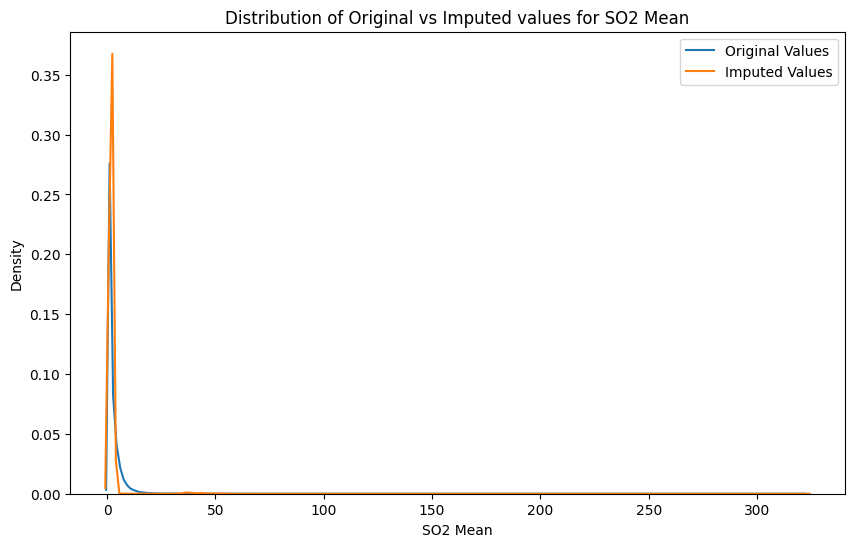

/tmp/ipykernel_9860/3355323046.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df.loc[df[missing_flag_col] == 1, column].dropna(), label="Imputed Values")


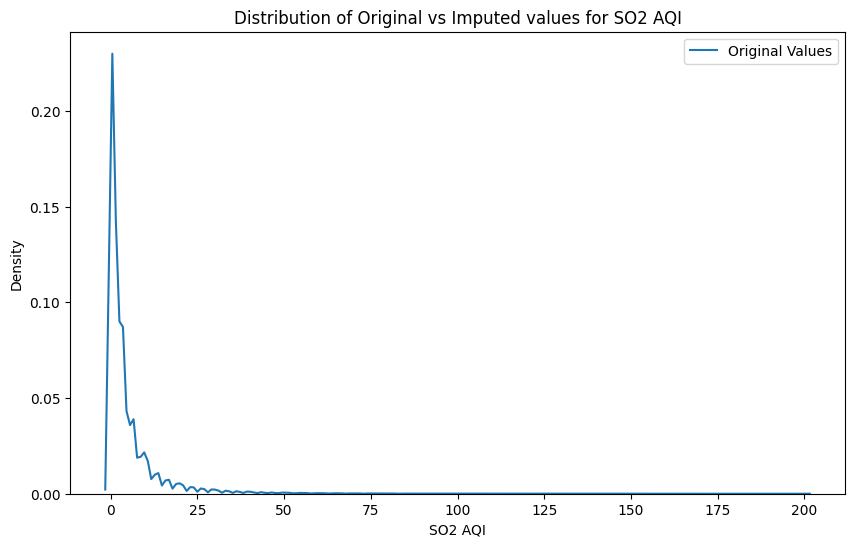

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with the imputed data and the missing flags

def plot_original_vs_imputed(df, column, missing_flag_col):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df.loc[df[missing_flag_col] == 0, column].dropna(), label="Original Values")
    sns.kdeplot(df.loc[df[missing_flag_col] == 1, column].dropna(), label="Imputed Values")
    plt.title(f"Distribution of Original vs Imputed values for {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Plot for SO2 Mean
plot_original_vs_imputed(df, "SO2 Mean", "SO2_AQI_missing")

# Plot for SO2 AQI
plot_original_vs_imputed(df, "SO2 AQI", "SO2_AQI_missing")